In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import pandas as pd  
import seaborn as sns 

%matplotlib inline

# Linear Regression Analysis

## Introduction to Linear Regression

Linear regression is one of the fundamental algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

### Simple Linear Regression

In its simplest form (simple linear regression), the model attempts to find a linear relationship between one feature and the target:

$y = \beta_0 + \beta_1x + \epsilon$

Where:
- $y$ is the dependent variable (target)
- $x$ is the independent variable (feature)
- $\beta_0$ is the intercept (value of y when x = 0)
- $\beta_1$ is the slope coefficient
- $\epsilon$ is the error term

### Multiple Linear Regression

When dealing with multiple features (multiple linear regression), the equation extends to:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

In matrix notation:
$y = X\beta + \epsilon$

Where:
- $y$ is the vector of target values
- $X$ is the matrix of features
- $\beta$ is the vector of coefficients
- $\epsilon$ is the vector of error terms

### Key Assumptions

1. **Linearity**: The relationship between X and y is linear
2. **Independence**: The observations are independent
3. **Homoscedasticity**: Constant variance in errors
4. **Normality**: The errors are normally distributed
5. **No Multicollinearity**: Independent variables are not highly correlated

### Model Estimation

The coefficients are estimated using the Ordinary Least Squares (OLS) method, which minimizes the sum of squared residuals:

$\min_{\beta} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

The solution in matrix form is:
$\hat{\beta} = (X^TX)^{-1}X^Ty$

### Model Evaluation Metrics

1. **R-squared (R²)**: Coefficient of determination
   $R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$

2. **Root Mean Square Error (RMSE)**:
   $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$

3. **Mean Absolute Error (MAE)**:
   $MAE = \frac{1}{n}\sum_{i=1}^n|y_i - \hat{y}_i|$

### Interpreting Linear Regression Results

1. **Coefficients ($\beta$)**:
   - Sign indicates direction of relationship
   - Magnitude shows strength of effect
   - Units are in terms of target variable per unit change in feature

2. **Standard Errors**:
   - Measure uncertainty in coefficient estimates
   - Used for confidence intervals and hypothesis testing
   - Smaller values indicate more precise estimates

3. **t-statistics and p-values**:
   - Test significance of individual coefficients
   - Null hypothesis: $\beta_i = 0$
   - p-value < 0.05 typically indicates statistical significance

4. **Confidence Intervals**:
   - Range of plausible values for coefficients
   - 95% CI: $\beta_i \pm 1.96 * SE(\beta_i)$

### Advantages and Limitations

**Advantages**:
- Simple to understand and implement
- Highly interpretable coefficients
- Computationally efficient
- Provides confidence intervals and hypothesis tests

**Limitations**:
- Assumes linear relationship
- Sensitive to outliers
- May not capture complex patterns
- Assumes independence of features

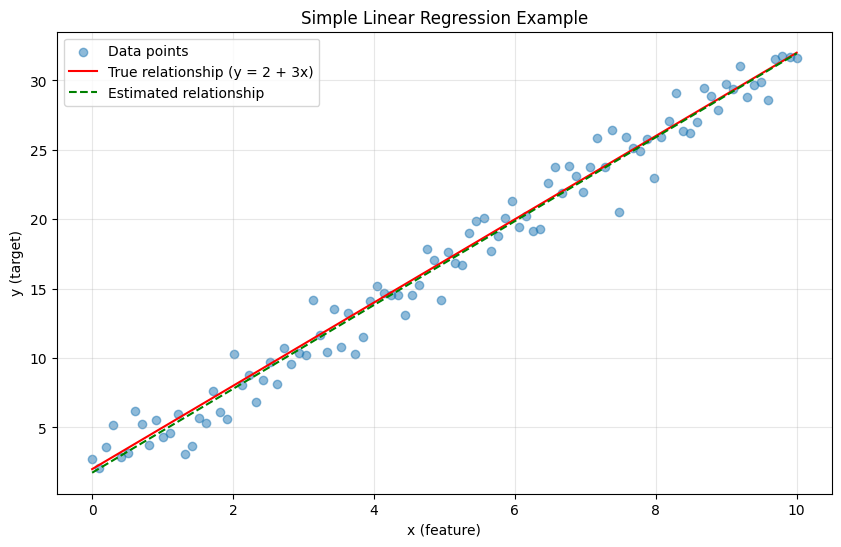

True parameters: intercept = 2, coefficient = 3
Estimated parameters: intercept = 1.74, coefficient = 3.02


In [2]:
# Visual representation of simple linear regression concept
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 + 3 * x + np.random.normal(0, 1.5, 100)  # True relationship: y = 2 + 3x + noise

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, 2 + 3 * x, 'r', label='True relationship (y = 2 + 3x)')

# Fit and plot the estimated relationship
model = LinearRegression()
X = x.reshape(-1, 1)
model.fit(X, y)
plt.plot(x, model.intercept_ + model.coef_[0] * x, '--g', label='Estimated relationship')

plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"True parameters: intercept = 2, coefficient = 3")
print(f"Estimated parameters: intercept = {model.intercept_:.2f}, coefficient = {model.coef_[0]:.2f}")

## Explain Like I'm 12: What is Linear Regression?

Imagine you're trying to guess how much an ice cream cone will cost based on how many scoops you want. If you know that:
- 1 scoop costs $2
- 2 scoops cost $4
- 3 scoops cost $6

You might notice a pattern: each scoop adds $2 to the price. This is exactly what linear regression does - it finds patterns in numbers to make predictions!

### 🍦 The Ice Cream Example

Think of it this way:
* Price = (Cost per scoop × Number of scoops) + Cone price
* In math terms: y = mx + b
  - y is what we're trying to predict (the price)
  - x is what we know (number of scoops)
  - m is the pattern we found ($2 per scoop)
  - b is our starting point (cone price, let's say $1)

So if you want 4 scoops:
* Price = ($2 × 4) + $1
* Price = $8 + $1 = $9

### 🏠 How This Helps with House Prices

Now, instead of ice cream scoops, we're looking at things like:
- How many rooms the house has
- How old the house is
- How big the house is

Just like we found that each ice cream scoop adds $2, we can find out:
- How much each extra room adds to the price
- How location affects the price
- How other features change the price

### 🎯 Why It's Called "Linear" Regression

"Linear" means "in a line". If you draw dots for each ice cream price and connect them, you get a straight line! This is why we call it linear regression - it finds the best straight line that fits through our points.

### 🎮 Think of it Like a Video Game

Imagine you're playing a game where you need to draw a line through a bunch of dots, and you get points based on how close your line is to all the dots. Linear regression is like having a computer play this game - it finds the best line that gets the highest score by being closest to all the points!

/home/alt/work/projects/laboratory/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/alt/work/projects/laboratory/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127846 (\N{SOFT ICE CREAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


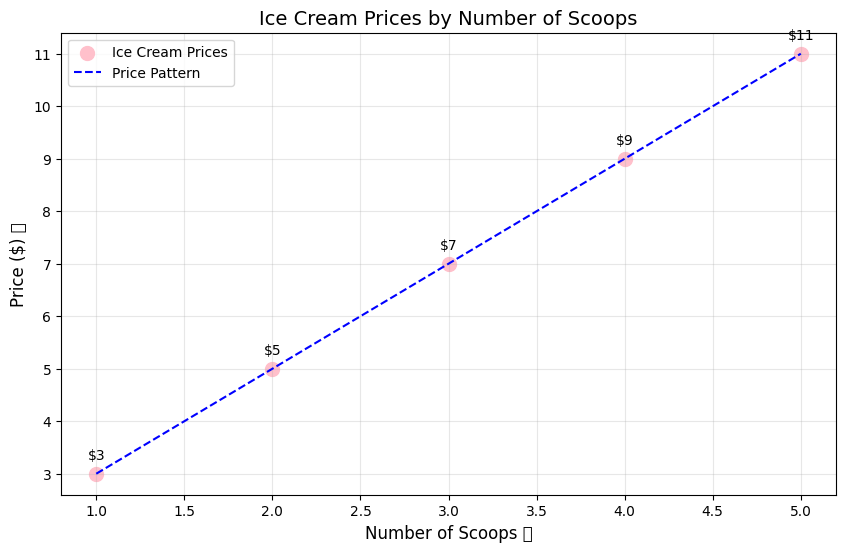

The pattern we found:
- Each scoop costs $2
- The cone costs $1
- So the formula is: Price = $2 × Scoops + $1


In [3]:
# Let's create a simple ice cream price example
scoops = np.array([1, 2, 3, 4, 5])
price = 2 * scoops + 1  # $2 per scoop plus $1 for the cone

plt.figure(figsize=(10, 6))
plt.scatter(scoops, price, s=100, c='pink', label='Ice Cream Prices')
plt.plot(scoops, price, 'b--', label='Price Pattern')

plt.title('Ice Cream Prices by Number of Scoops', fontsize=14)
plt.xlabel('Number of Scoops 🍦', fontsize=12)
plt.ylabel('Price ($) 💵', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Add price labels
for i, j in zip(scoops, price):
    plt.annotate(f'${j}', xy=(i, j), xytext=(0, 10),
                textcoords='offset points', ha='center')

plt.show()

print("The pattern we found:")
print("- Each scoop costs $2")
print("- The cone costs $1")
print("- So the formula is: Price = $2 × Scoops + $1")

### 1. Understanding the Business Problem

Performing linear regression with Python on California house characteristics and prices.

Using the California Housing dataset, we'll use linear regression to understand the relationship between houses in California and their prices.
Do house characteristics influence their value?

  **MedInc**: Median income in block group  
  **HouseAge**: Median house age in block group  
  **AveRooms**: Average number of rooms per household  
  **AveBedrms**: Average number of bedrooms per household  
  **Population**: Block group population  
  **AveOccup**: Average number of household members  
  **Latitude**: Block group latitude  
  **Longitude**: Block group longitude  
  **MedHouseVal**: Median house value in $100,000s

### 2. Understanding the Data

In [4]:
# Load the California housing dataset
housing = fetch_california_housing()

# Create a pandas DataFrame
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

# Display first few rows
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Data Visualization**

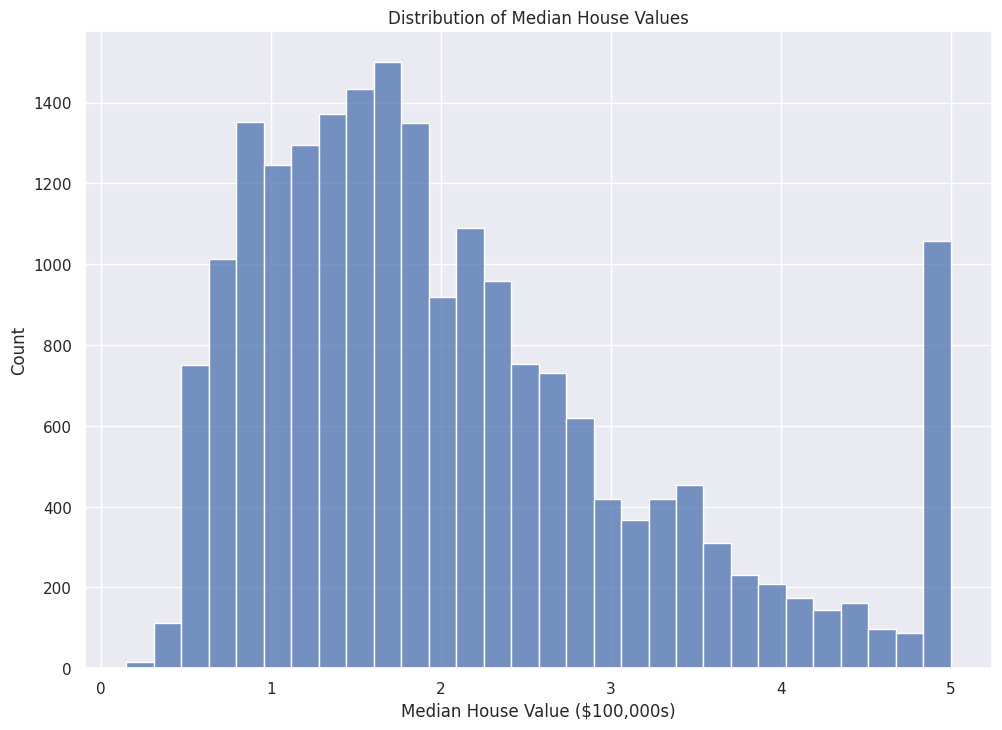

In [6]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.histplot(data=housing_df, x='MedHouseVal', bins=30)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($100,000s)')
plt.show()

**Correlation matrix**

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = housing_df.corr().round(2)

<Axes: >

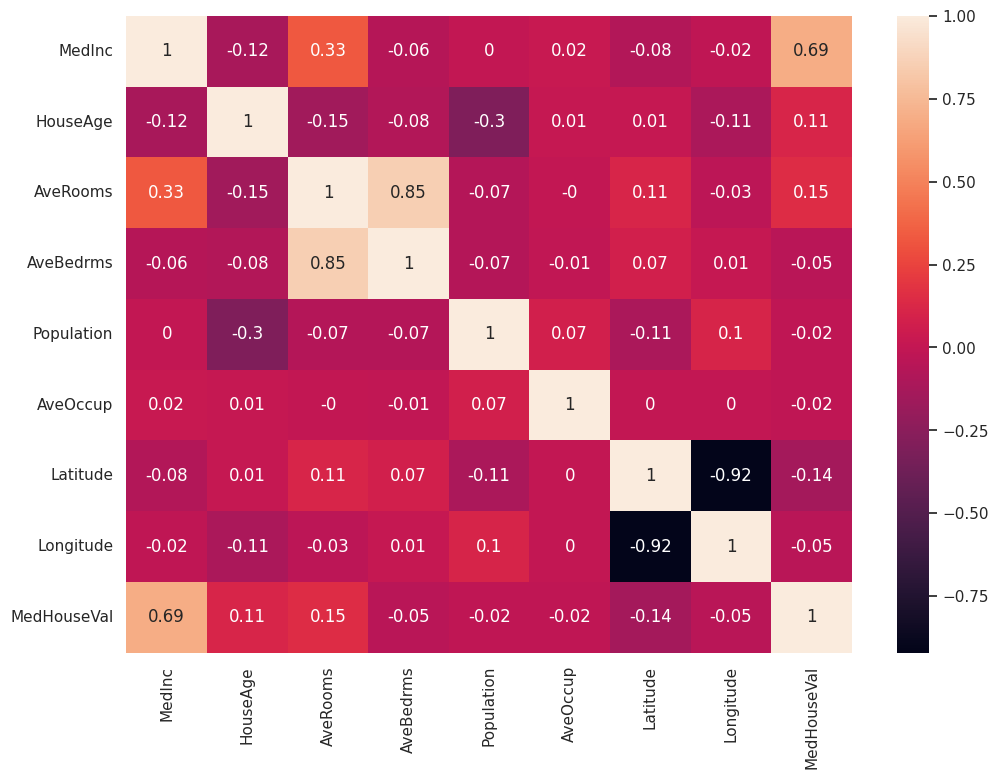

In [8]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**

* In the correlation above, we can verify that **MedHouseVal** is strongly correlated with **MedInc** (median income) and **AveRooms** (average number of rooms)

* **AveRooms** and **AveBedrms** show correlation, which is expected as they are related housing characteristics

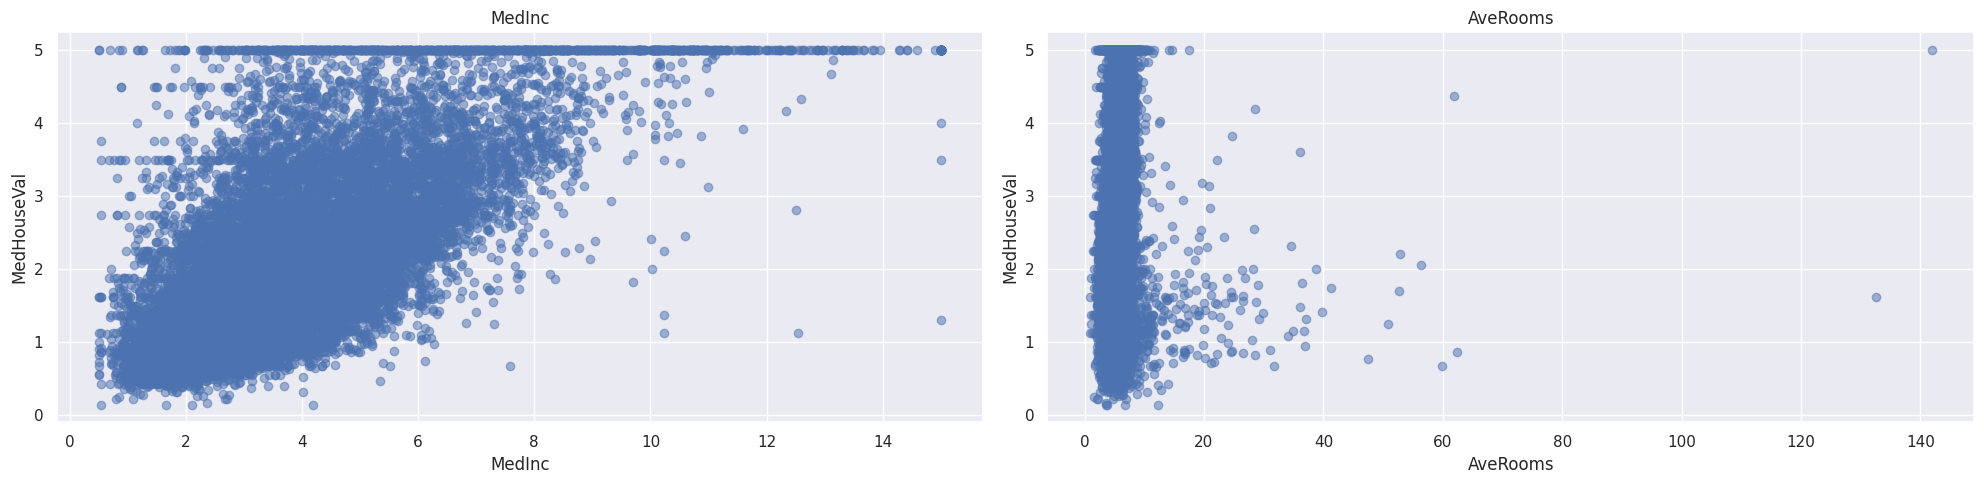

In [9]:
plt.figure(figsize=(20, 5))

features = ['MedInc', 'AveRooms']
target = housing_df['MedHouseVal']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing_df[col]
    y = target
    plt.scatter(x, y, marker='o', alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
plt.tight_layout()
plt.show()

Positive correlation between MedInc (median income) and MedHouseVal (median house value)
Positive correlation between AveRooms (average number of rooms) and MedHouseVal (median house value)

### 3. Data Preparation

In [10]:
# Separate features and target
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df['MedHouseVal']

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Split the data into training and testing sets**

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


### 4. Modeling

In [13]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.7196757085831575
R2 score is 0.6125511913966952




**RMSE (Root Mean Squared Error)**: is the measure that calculates the "root mean square" of the errors between observed (real) values and predictions (hypotheses).

The coefficient of determination, also called **R²**, is a measure of fit for a generalized linear statistical model, such as simple or multiple linear regression, to the observed values of a random variable.
R² varies between 0 and 1, sometimes expressed as a percentage.
In this case, it expresses the amount of data variance that is explained by the linear model.
Therefore, the higher the R², the more explanatory the linear model is, meaning it better fits the sample.
For example, an R² = 0.73 means that the linear model explains 73.00% of the dependent variable's variance using the regressors (independent variables) included in that linear model.

In [15]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE (Root Mean Square Error): is {}'.format(rmse))
print('R² (Coefficient of determination): is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE (Root Mean Square Error): is 0.745581383012776
R² (Coefficient of determination): is 0.5757877060324512


### Feature Importance Analysis

Let's analyze the coefficients of our linear regression model to understand how each feature influences house prices. In linear regression:

- Positive coefficients indicate that an increase in the feature leads to an increase in the target variable
- Negative coefficients indicate that an increase in the feature leads to a decrease in the target variable
- The magnitude of the coefficient shows the strength of the impact
- Coefficients are in the scale of the target variable ($100,000s) per unit change in the feature

In [16]:
# Create a DataFrame with feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_model.coef_
})

# Sort by absolute value of coefficient to see most influential features
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Display the results
print("Feature Coefficients and their Impact on House Prices:\n")
print(feature_importance_sorted.to_string(index=False))

Feature Coefficients and their Impact on House Prices:

   Feature  Coefficient  Abs_Coefficient
 AveBedrms     0.783145         0.783145
    MedInc     0.448675         0.448675
 Longitude    -0.433708         0.433708
  Latitude    -0.419792         0.419792
  AveRooms    -0.123323         0.123323
  HouseAge     0.009724         0.009724
  AveOccup    -0.003526         0.003526
Population    -0.000002         0.000002


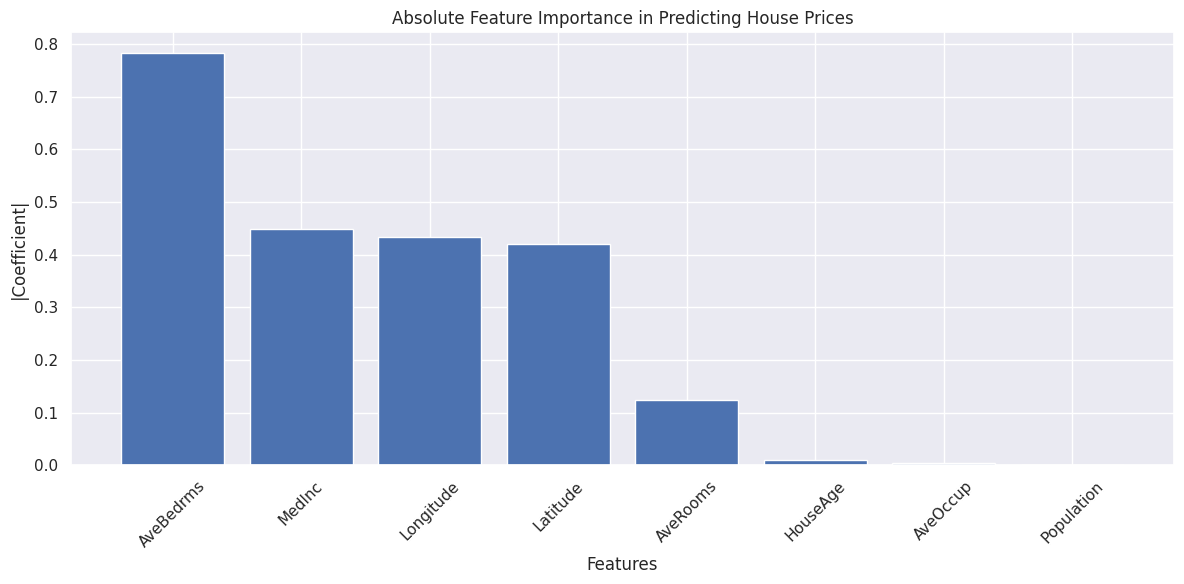

In [17]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_sorted['Feature'], feature_importance_sorted['Abs_Coefficient'])
plt.xticks(rotation=45)
plt.title('Absolute Feature Importance in Predicting House Prices')
plt.xlabel('Features')
plt.ylabel('|Coefficient|')
plt.tight_layout()
plt.show()

### Interpreting the Coefficients

Let's understand what these coefficients mean in practical terms. Each coefficient represents how much the house price changes (in $100,000s) when the corresponding feature increases by one unit, assuming all other features remain constant.

For example:
- If the coefficient for MedInc is 0.4, it means that an increase of 1 unit in median income is associated with an increase of $40,000 in house price
- If the coefficient for HouseAge is 0.1, it means that an increase of 1 year in house age is associated with an increase of $10,000 in house price

Note that the relationships in linear regression are assumed to be:
1. Linear: The effect is proportional
2. Additive: The effects of different features add up
3. Independent: The effect of one feature doesn't depend on the values of other features

#### Feature Scaling Consideration
Since our features are on different scales (e.g., income vs. number of rooms), the raw coefficients might not directly indicate relative importance. That's why we also look at the absolute values to understand the magnitude of impact.

In [18]:
# Calculate standardized coefficients for fair comparison
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model with standardized features
lin_model_scaled = LinearRegression()
lin_model_scaled.fit(X_scaled, y)

# Create DataFrame with standardized coefficients
standardized_coef = pd.DataFrame({
    'Feature': X.columns,
    'Standardized_Coefficient': lin_model_scaled.coef_
})

# Sort by absolute value
standardized_coef['Abs_Std_Coefficient'] = abs(standardized_coef['Standardized_Coefficient'])
standardized_coef_sorted = standardized_coef.sort_values('Abs_Std_Coefficient', ascending=False)

print("Standardized Coefficients (impact per standard deviation change):\n")
print(standardized_coef_sorted.to_string(index=False))

Standardized Coefficients (impact per standard deviation change):

   Feature  Standardized_Coefficient  Abs_Std_Coefficient
  Latitude                 -0.899886             0.899886
 Longitude                 -0.870541             0.870541
    MedInc                  0.829619             0.829619
 AveBedrms                  0.305696             0.305696
  AveRooms                 -0.265527             0.265527
  HouseAge                  0.118752             0.118752
  AveOccup                 -0.039326             0.039326
Population                 -0.004503             0.004503


### Understanding Standardized Coefficients


Standardized coefficients help us compare feature importance on a level playing field by showing the impact of a one standard deviation change in each feature. This is particularly useful when features are measured in different units.

For example:
- If the standardized coefficient for MedInc is 0.8, it means that an increase of one standard deviation in median income is associated with a 0.8 standard deviation increase in house price
- Negative standardized coefficients indicate inverse relationships
- The larger the absolute value of the standardized coefficient, the stronger the feature's impact

This standardized view helps us understand which features have the most predictive power, regardless of their original scale.

### RESULTS EVALUATION

In [19]:
X_test.loc[:,'actual']   = y_test
X_test.loc[:,'predicted'] = y_test_predict

In [20]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,actual,predicted
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.719123
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,1.764017
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,2.709659
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.838926
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.604657


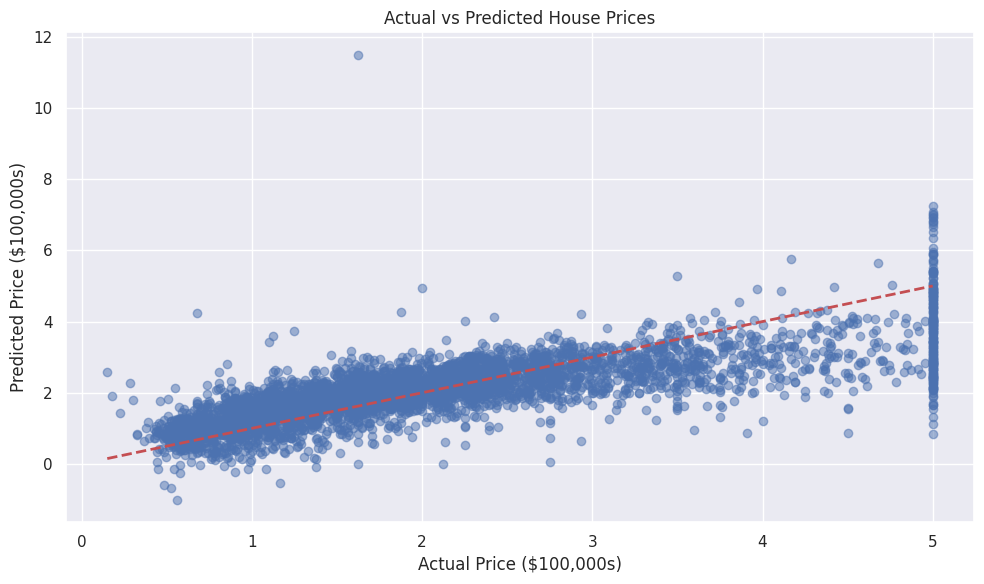

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()